# 🧱🏭 **Training and Building of PVRE-MNIST Dataset**

**Source:** [Inducing Causal Structure for Interpretable Neural Networks]("https://arxiv.org/pdf/2112.00826.pdf")

## 📝 Notes:

* Input is a grid of $4$ images of mnist. 
* The $4$ input images are defined as $(I_{TL}, I_{TR}, I_{BL}, T_{BR})$
* It creates a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



## 📊👨🏻‍💻 **Splitting the train-test split based on the condition**

* PVR-MNIST is created such that a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



In [9]:
from imports import *

folder_path = 'pvr_mnist_dataset/images/'

In [10]:
# names = [i for i in os.listdir(folder_path)]
# images = [[np.array(Image.open(os.path.join(folder_path,names[i])).convert('RGB')), int(*re.findall(r'\d+',names[i]))] for i in tqdm(range(len(names)))]

 
# # p(len(images))

In [11]:
# images

In [12]:
# images_, labels = zip(*images)

# # Convert to numpy arrays
# images_np = np.array(images_)
# labels_np = np.array(labels)

# # Save images and labels to .npy files
# np.save('images.npy', images_np)
# np.save('labels.npy', labels_np)


In [13]:
images = np.load('images.npy')
labels_index = np.load('labels.npy')

In [14]:
import os
os.getcwd()

'/Users/maheepchaudhary/pytorch/Projects/Stanford/pyvene-maheep/maheep'

In [15]:
labels = np.load('pvr_mnist_dataset/labels/combined_labels.npy')

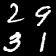

In [16]:
transforms.ToPILImage()(images[0])

The format of the image is like:

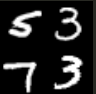

Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

In [17]:
print(labels)

[[5 1 3 9]
 [8 0 8 0]
 [2 9 5 9]
 ...
 [3 9 5 8]
 [3 4 5 8]
 [3 9 0 9]]


In [18]:
labels[labels_index[0]]

array([2, 3, 9, 1])

In [19]:
train_image, test_image, train_label, test_label = [], [], [], []


def filter(images, labels):
    for image, label_index in tqdm(zip(images, labels_index)):
        label = list(labels[label_index])
        if label[2] in {1,2,3} or label[1] in {4,5,6} or label[-1] in {0,7,8,9}:
            test_image.append(image)
            test_label.append(label)
        else:
            train_image.append(image)
            train_label.append(label)

    return train_image, test_image, train_label, test_label

In [20]:
train_image, test_image, train_label, test_label = filter(images, labels)

0it [00:00, ?it/s]

1000000it [00:01, 701518.61it/s]


In [21]:
# Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

def updated_labels(labels):

    updated_labels = []

    for label in tqdm(labels):
        if label[0] in {0,1,2,3}:
            updated_labels.append(label[2])
        elif label[0] in {4,5,6}:
            updated_labels.append(label[1])
        else:
            updated_labels.append(label[-1])
    
    return updated_labels

test_updated_labels = updated_labels(test_label)
train_updated_labels = updated_labels(train_label) 

100%|██████████| 293182/293182 [00:00<00:00, 5551768.14it/s]


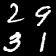

In [22]:
transforms.ToPILImage()(train_image[0])


In [23]:
train_updated_labels[0]

9

In [24]:

train_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(train_image)])
train_images = torch.tensor(train_images).float().reshape(-1, 3, 56, 56)
print(train_images.shape)

train_images


test_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(test_image)])
test_images = torch.tensor(test_images).float().reshape(-1, 3, 56, 56)
# test_images = test_images.repeat(1, 3, 1, 1)

test_images


100%|██████████| 293182/293182 [00:06<00:00, 44561.95it/s]


torch.Size([293182, 3, 56, 56])


100%|██████████| 706818/706818 [00:14<00:00, 49515.55it/s]


tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 191., 255., 255.],
          [255., 255., 255.,  ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ..., 137., 137., 204.],
          [204., 204., 253.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  ..., 251., 251., 253.],
          [253., 253., 253.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...

In [25]:
train_images.shape

torch.Size([293182, 3, 56, 56])

We will have to modify the labels based on the condition: 

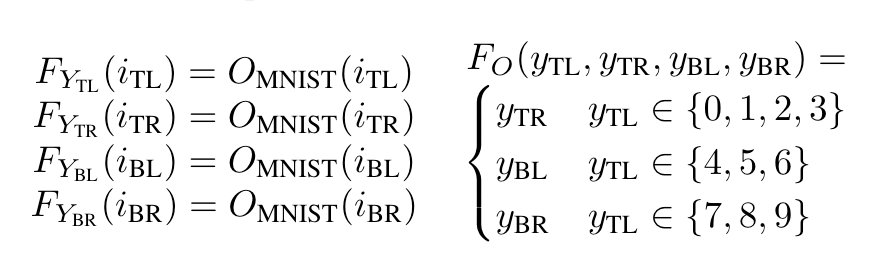

In [26]:
test_labels = torch.tensor(np.array(test_updated_labels)).long()
train_labels = torch.tensor(np.array(train_updated_labels)).long()

## 🚅🏋🏻‍♂️ **Training the ResNet on PVR-MNIST Dataset**

In [27]:
from transformers import ResNetForImageClassification, ResNetConfig
from imports import *

# ResNetConfig.num_labels = 10
resnet = ResNetForImageClassification(ResNetConfig(num_labels=10))
resnet.config

ResNetConfig {
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "pooler_shape": [
    1,
    1,
    14,
    14
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "transformers_version": "4.36.2"
}

In [28]:
resnet

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [29]:
# Ensure the model is on the correct device
device = torch.device("mps")
print(device)
resnet = resnet.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 5

mps


In [30]:
def calculate_accuracy(model, images, labels, device, batch_size):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            data = images[i:i+batch_size].to(device)
            target = labels[i:i+batch_size].to(device)

            outputs = model(data)
            logits = outputs.logits 
            _, predicted = torch.max(logits.data, 1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

    return 100 * correct / total

validation_fraction = 0.2  


num_training_samples = len(train_labels)
num_validation_samples = int(num_training_samples * validation_fraction)


val_indices = np.random.choice(num_training_samples, num_validation_samples, replace=False)
train_indices = np.array(list(set(range(num_training_samples)) - set(val_indices)))


val_images = train_images[val_indices]
val_labels = train_labels[val_indices]
new_train_images = train_images[train_indices]
new_train_labels = train_labels[train_indices]



mean, std = 0.1307, 0.3081
train_images = (train_images - mean) / std  


batch_size = 2000  

for epoch in tqdm(range(num_epochs)):
    resnet.train() 
    total_loss = 0


    for i in tqdm(range(0, len(new_train_images), batch_size)):
        data = new_train_images[i:i+batch_size].to(device)
        target = new_train_labels[i:i+batch_size].to(device)

        optimizer.zero_grad()
        output = resnet(data)
        logits = output.logits 
        loss = criterion(logits, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss = total_loss / (len(new_train_images) // batch_size)


    train_accuracy = calculate_accuracy(resnet, new_train_images, new_train_labels, device, batch_size)
    val_accuracy = calculate_accuracy(resnet, val_images, val_labels, device, batch_size)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%')


  0%|          | 0/5 [00:00<?, ?it/s]

The shape of the embedding is:  torch.Size([2000, 64, 14, 14])
The shape of the embedding is:  torch.Size([2000, 64, 14, 14])
The shape of the hidden state is:  torch.Size([2000, 64, 14, 14])


The shape of the embedding is:  torch.Size([2000, 64, 14, 14])
The shape of the embedding is:  torch.Size([2000, 64, 14, 14])
The shape of the hidden state is:  torch.Size([2000, 64, 14, 14])


  0%|          | 0/5 [00:12<?, ?it/s]


KeyboardInterrupt: 

: 

In [ ]:
resnet.save_pretrained('resnet_pvr_model')

In [ ]:
torch.save(resnet.state_dict(), 'resnet_pvr_model/resnet_state_dict.pth')

## 🪨🔨 Evaluation

In [ ]:
from imports import *
from transformers import ResNetForImageClassification, ResNetConfig

resnet_trained = ResNetForImageClassification.from_pretrained('resnet_pvr_model')

In [ ]:
correct = 0
total = 0
device = torch.device("mps")
resnet_trained.eval().to(device)

with torch.no_grad():
    for i in tqdm(range(len(test_images))):
        # Move tensors to the configured device
        images = test_images[i].unsqueeze(0)
        images = images.to(device)
        labels = torch.tensor([test_labels[i]]).to(device)
        
        # Forward pass: compute the model output
        outputs = resnet_trained(images)
        
        # Get the predictions
        _, predicted = torch.max(outputs.logits, 1)
        
        # Update the counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the training images: {accuracy:.2f}%') 

100%|██████████| 706818/706818 [4:35:32<00:00, 42.75it/s]     

Accuracy of the model on the training images: 49.37%
